# Modelo RNN  
Este es el primer modelo de red neuronal implementado. Con el se busca establecer las bases de arquitecturas a implementar en modelos mas complejos que involucren las redes neuronales.

In [3]:
!pip install tensorflow
!pip install theano
!pip install keras

  Using cached grpcio-1.31.0-cp38-cp38-win_amd64.whl (2.6 MB)

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\josel\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing c:\users\josel\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached protobuf-3.13.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorboard-2.3.0-py3-none-any.whl (6.8 MB)
  Using cached scipy-1.4.1-cp38-cp38-win_amd64.whl (31.0 MB)
  Using cached google_auth_oauthlib-0.4.1-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached Markdown-3.2.2-py3-none-any.whl (88 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached rsa-4.6-py3-none-any.whl (47 kB)
  Using cached cachetools-4.1.1-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.p

In [5]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
from pathlib import Path # includes glob
#import glob             # Unix pathname pattern expansion, Ex. glob.glob('**/*.txt', recursive=True)
import pickle
warnings.filterwarnings("ignore")
# import altair as alt
import os
import seaborn
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model

## Lectura de datos

In [6]:
new_directory = os.getcwd()

In [7]:
data_casa_1 = pd.read_csv(new_directory + "\\low_freq\\data_casas\\data_casa_1.csv",sep=r' ',encoding='utf-8',header=0, index_col = 0)
data_casa_2 = pd.read_csv(new_directory + "\\low_freq\\data_casas\\data_casa_2.csv",sep=r' ',encoding='utf-8',header=0, index_col = 0)
data_casa_3 = pd.read_csv(new_directory + "\\low_freq\\data_casas\\data_casa_3.csv",sep=r' ',encoding='utf-8',header=0, index_col = 0)
data_casa_4 = pd.read_csv(new_directory + "\\low_freq\\data_casas\\data_casa_4.csv",sep=r' ',encoding='utf-8',header=0, index_col = 0)
data_casa_5 = pd.read_csv(new_directory + "\\low_freq\\data_casas\\data_casa_5.csv",sep=r' ',encoding='utf-8',header=0, index_col = 0)
data_casa_6 = pd.read_csv(new_directory + "\\low_freq\\data_casas\\data_casa_6.csv",sep=r' ',encoding='utf-8',header=0, index_col = 0)

In [8]:
data_casa_1.columns

Index(['mains_1', 'mains_2', 'oven_3', 'oven_4', 'refrigerator_5',
       'dishwaser_6', 'kitchen_outlets_7', 'kitchen_outlets_8', 'lighting_9',
       'washer_dryer_10', 'microwave_11', 'bathroom_gfi_12',
       'electric_heat_13', 'stove_14', 'kitchen_outlets_15',
       'kitchen_outlets_16', 'lighting_17', 'lighting_18', 'washer_dryer_19',
       'washer_dryer_20'],
      dtype='object')

## División de los datos  
La división de los datos es necesaria para evitar over fitting o sobre entrenamiento del model. De está manera el sistema tendra capacidad de generalizar.  
Usaremos las casa 1 como base de datos de entrenamiento, debido a que cuenta con buena variabilidad de dispositivos y el mayor tamaño de datos.  
Para este proceso en futuras bases de datos, tenga en cuenta, que es necesario normalizar los datos cuando las variables son de diferente naturaleza o rango de valor. Esto ayuda a que el proceso de aprendizaje sea más acertado, disminuya el tiempo de procesamiento y mejoren los resultados. En este caso no es necesario.  
La división que se ha tomado es de 67% para el entrenamiento y 33% para test. Este valor es valido debido a que tenemos una buena cantidad de datos. 

In [9]:
#data_casa_1.shape

In [10]:
#Puntos de corte
#train_length = int(data_casa_1.shape[0]*0.67) #Entrenamiento 67%
#test_length = int(data_casa_1.shape[0] - train_length) #Prueba 33%
#total_length = train_length + test_length

In [8]:
#Train / Test
#train = data_casa_1[0: train_length]
#test = data_casa_1[train_length: total_length]
#print(f'Train {train.shape}')
#print(f'Test {test.shape}')

Train (272521, 20)
Test (134227, 20)


## Creando el modelo RNN
En esta sección se crearán las arquitecturas RNN para evaluar su rendimiento. Este primer modelo se tomara como base para la fabricación de redes LSTM y GRU.  
El primer modelo sirve para evaluar si el modelo es capaz de predecir cuando se enciende el refrigerador usando como entrada del modelo las mediciones en la red general mains_1 y mains_2.
El modelo cuenta con un dropout del 50%, este proceso desactiva temporalmente el 50% de capaz al azar. Este proceso evita la codependencia de las neuronas al ajustar su peso, mejorando la generalización.

In [5]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.regularizers import l2

In [10]:
# Usando mains_1, mains_2 para predecir el uso del refrigerador
X_train1 = train[['mains_1','mains_2']].values #Variables 2 de entrada
y_train1 = train['refrigerator_5'].values #Etiquetas del refrigerador

X_test1 = test[['mains_1','mains_2']].values #Variables 2 de entrada
y_test1 = test['refrigerator_5'].values #Etiquetas del refrigerador

print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(272521, 2) (272521,) (134227, 2) (134227,)


In [11]:
def build_fc_model(layers):
    fc_model = Sequential() #Crea un objeto vacio que contendra el modelo
    for i in range(len(layers)-1):
        #print(f'input_dim = {layers[i]}')
        #print(f'output_dim = {layers[i+1]}')
        
        #Para evitar problemas defina los valores de las neuronas por fuera de Dense
        output_dim = layers[i+1]
        input_dim = layers[i]
        fc_model.add(Dense(layers[i+1], input_dim = layers[i]))
              
        fc_model.add(Dropout(0.25))
        if i < (len(layers) - 2):
            fc_model.add( Activation('relu'))
        #else:
        #    fc_model.add( Activation('sigmoid'))
    fc_model.summary()
    
    return fc_model

fc_model_1 = build_fc_model([2, 512, 512, 1024, 1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1100)              3300      
_________________________________________________________________
dropout (Dropout)            (None, 1100)              0         
_________________________________________________________________
activation (Activation)      (None, 1100)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               563712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              5

In [12]:
adam = Adam(lr = 1e-5) #Optimizador con learnig rate de 1e-5
fc_model_1.compile(loss='mean_squared_error', optimizer=adam, metrics=['binary_accuracy']) 
#Guarda los pesos del entrenamiento en ciertos puntos para continuar el entrenamiento o guardar el modelo
checkpointer = ModelCheckpoint(filepath="./fc_refrig_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_1 = fc_model_1.fit( X_train1, y_train1, batch_size=300, verbose=1, epochs=20, validation_split=0.33, callbacks=[checkpointer])


Epoch 1/20
609/609 [==============================] - 17s 27ms/step - loss: 8984.5752 - binary_accuracy: 5.4768e-06 - val_loss: 7521.3394 - val_binary_accuracy: 2.1127e-04
Epoch 2/20
609/609 [==============================] - 17s 28ms/step - loss: 8697.7490 - binary_accuracy: 1.0954e-05 - val_loss: 7243.7720 - val_binary_accuracy: 2.7799e-04
Epoch 3/20
609/609 [==============================] - 16s 27ms/step - loss: 8507.3115 - binary_accuracy: 1.0954e-05 - val_loss: 7138.4038 - val_binary_accuracy: 3.8918e-04
Epoch 4/20
609/609 [==============================] - 17s 27ms/step - loss: 8351.9209 - binary_accuracy: 1.0954e-05 - val_loss: 6843.8652 - val_binary_accuracy: 3.4470e-04
Epoch 5/20
609/609 [==============================] - 16s 27ms/step - loss: 8230.4150 - binary_accuracy: 1.0954e-05 - val_loss: 7006.4600 - val_binary_accuracy: 4.2254e-04
Epoch 6/20
609/609 [==============================] - 17s 27ms/step - loss: 8115.0215 - binary_accuracy: 5.4768e-06 - val_loss: 6513.8950 - 

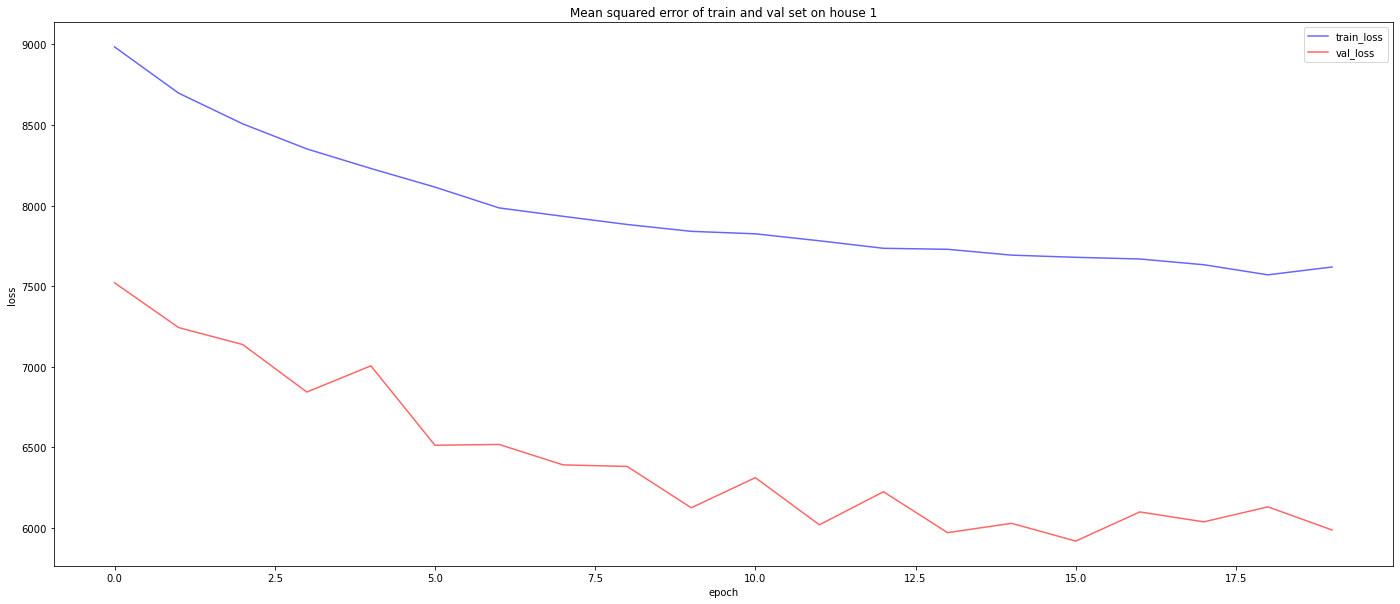

In [13]:
train_loss = hist_fc_1.history['loss']
val_loss = hist_fc_1.history['val_loss']
def plot_losses(train_loss, val_loss):
    plt.rcParams["figure.figsize"] = [24,10]
    plt.title('Mean squared error of train and val set on house 1')
    plt.plot( range(len(train_loss)), train_loss, color = 'b', alpha = 0.6, label='train_loss' )
    plt.plot( range(len( val_loss )), val_loss, color = 'r', alpha = 0.6, label='val_loss' )
    plt.xlabel( 'epoch' )
    plt.ylabel( 'loss' )
    plt.legend()

plot_losses(train_loss, val_loss)

### Validando el modelo

In [14]:
scores = fc_model_1.evaluate(X_test1, y_test1)
print("\n%s: %.2f%%" % (fc_model_1.metrics_names[1], scores[1]*100))

4195/4195 [==============================] - 7s 2ms/step - loss: 6906.1348 - binary_accuracy: 0.0000e+00

binary_accuracy: 0.00%


## Creando una nueva arquitectura

### División de los datos usando sklearn
- Como entrada usaremos los datos main_1 y main_2 correspondientes a las columnas 0 y 1
- Como layer usaremos el refrigerador 
- Las proporciones seran de 80 y 20%

In [6]:
variables = data_casa_1[['mains_1','mains_2']].values
objetivos = data_casa_1['refrigerator_5'].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(variables, objetivos, test_size = 0.2,  random_state = 2020)
print(f'x_train {x_train.shape}, x_test {x_test.shape}, y_train {y_train.shape}, y_test {y_test.shape}')

x_train (325398, 2), x_test (81350, 2), y_train (325398,), y_test (81350,)


Se creara un grupo de control o evaluación para el conjunto de datos. Este conjunto sera extraido del conjunto de datos de train definidos en la línea anterior.  
En estos casos se toma la división en proporción 90 y 10%

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1,  random_state = 2020)
print(f'x_train {x_train.shape}, x_val {x_val.shape}, y_train {y_train.shape}, y_val {y_val.shape}')

x_train (292858, 2), x_val (32540, 2), y_train (292858,), y_val (32540,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

Por convension se toman valores multiplos de 2.  
loss = 'binary_crossentropy'

In [10]:
model = Sequential()
model.add(Dense(256, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'mse', metrics=['accuracy'])

In [11]:
#pip install pydot

In [12]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png',show_shapes=True)

In [14]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 5, batch_size =  300, verbose = 1)

Epoch 1/5
977/977 [==============================] - 10s 10ms/step - loss: 10989.6602 - accuracy: 5.1219e-05 - val_loss: 10791.5713 - val_accuracy: 3.0731e-05
Epoch 2/5
977/977 [==============================] - 8s 9ms/step - loss: 10989.6455 - accuracy: 5.1219e-05 - val_loss: 10791.5713 - val_accuracy: 3.0731e-05
Epoch 3/5
977/977 [==============================] - 8s 8ms/step - loss: 10989.6348 - accuracy: 5.1219e-05 - val_loss: 10791.5713 - val_accuracy: 3.0731e-05
Epoch 4/5
977/977 [==============================] - 8s 8ms/step - loss: 10989.6592 - accuracy: 5.1219e-05 - val_loss: 10791.5713 - val_accuracy: 3.0731e-05
Epoch 5/5
977/977 [==============================] - 8s 8ms/step - loss: 10989.6357 - accuracy: 5.1219e-05 - val_loss: 10791.5713 - val_accuracy: 3.0731e-05


- Nuevamente se observa que el accuracy y la función de perdida no tienen ningún cambio o mejora a pesar de agregar capas ocultas y aumentar el número de neuronas. 
- Intentaremos mejorar los resultados normalizando los datos. 

### Normalizando los datos
Primero se hacemos una inspección visual para determinar si la base de datos tiene rangos de valores demasiado grandes entre ellos. 

In [17]:
data_casa_1.head(10)

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:30,222.90,118.76,0.0,0.0,6.0,0.0,33.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,66.0,46.0,0.0,0.0
2011-04-18 13:22:33,222.96,118.88,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:37,222.54,118.36,0.0,0.0,6.0,0.0,34.0,21.0,82.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:40,226.03,119.17,0.0,0.0,6.0,0.0,38.0,21.0,82.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:44,222.96,119.03,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0


In [25]:
etiquetas = list(data_casa_1)
for i in range(len(etiquetas)):
    print(f'{etiquetas[i]} max =  {data_casa_1[etiquetas[i]].max()} {etiquetas[i]} min =  {data_casa_1[etiquetas[i]].min()}')

#print(f'mains_1 max =  {data_casa_1["mains_1"].max()} mains_1 min =  {data_casa_1["mains_1"].min()}')

mains_1 max =  6081.36 mains_1 min =  51.87
mains_2 max =  6288.42 mains_2 min =  36.72
oven_3 max =  1725.0 oven_3 min =  0.0
oven_4 max =  2565.0 oven_4 min =  0.0
refrigerator_5 max =  2359.0 refrigerator_5 min =  0.0
dishwaser_6 max =  1422.0 dishwaser_6 min =  0.0
kitchen_outlets_7 max =  59.0 kitchen_outlets_7 min =  7.0
kitchen_outlets_8 max =  1550.0 kitchen_outlets_8 min =  3.0
lighting_9 max =  363.0 lighting_9 min =  0.0
washer_dryer_10 max =  4475.0 washer_dryer_10 min =  0.0
microwave_11 max =  2906.0 microwave_11 min =  1.0
bathroom_gfi_12 max =  1686.0 bathroom_gfi_12 min =  0.0
electric_heat_13 max =  192.0 electric_heat_13 min =  0.0
stove_14 max =  36.0 stove_14 min =  0.0
kitchen_outlets_15 max =  1118.0 kitchen_outlets_15 min =  0.0
kitchen_outlets_16 max =  1585.0 kitchen_outlets_16 min =  0.0
lighting_17 max =  112.0 lighting_17 min =  0.0
lighting_18 max =  90.0 lighting_18 min =  0.0
washer_dryer_19 max =  17.5 washer_dryer_19 min =  0.0
washer_dryer_20 max =  3

- Los datos estan demasiado separados variando desde decimales a miles
- Como se mensiono probaremos si el modelo mejora al normalizar los datos, si bien las medidas maximas tomadas del refrigerador estan en el mismo orden de magnitud de las medidas de las líneas se probara como primer aproximación. 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
scaler2 = StandardScaler()
ytrainRS = y_train.reshape(-1,1)
yvalRS = y_val.reshape(-1,1)
scaler2.fit(ytrainRS)
y_train_scaled = scaler2.transform(ytrainRS)
y_val_scaled = scaler2.transform(yvalRS)

In [66]:
#Se va a normalisar el conjunto de datos total
from sklearn import preprocessing
df_n1 = data_casa_1
scaler = preprocessing.Normalizer(norm = 'l2', copy=True)
df_n1 = scaler.fit_transform(df_n1)

In [78]:
variables = df_n1[:,:1]
objetivos = df_n1[:,2]

In [81]:
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(variables, objetivos, test_size = 0.2,  random_state = 2020)
print(f'x_train_norm {x_train_norm.shape}, x_test_norm {x_test_norm.shape}, y_train_norm {y_train_norm.shape}, y_test_norm {y_test_norm.shape}')

x_train_norm, x_val_norm, y_train_norm, y_val_norm = train_test_split(x_train_norm, y_train_norm, test_size = 0.1,  random_state = 2020)
print(f'x_train {x_train_norm.shape}, x_val {x_val_norm.shape}, y_train {y_train_norm.shape}, y_val {y_val_norm.shape}')

x_train_norm (325398, 1), x_test_norm (81350, 1), y_train_norm (325398,), y_test_norm (81350,)
x_train (292858, 1), x_val (32540, 1), y_train (292858,), y_val (32540,)


In [84]:
model = Sequential()
model.add(Dense(256, input_dim = x_train_norm.shape[1], activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'mse', metrics=['accuracy'])
model.fit(x_train_norm, y_train_norm, validation_data = (x_val_norm, y_val_norm), epochs = 200, batch_size =  300, verbose = 1)

Epoch 1/200
977/977 [==============================] - 7s 8ms/step - loss: 0.0021 - accuracy: 0.9731 - val_loss: 5.3031e-04 - val_accuracy: 0.9742
Epoch 2/200
977/977 [==============================] - 7s 8ms/step - loss: 5.4491e-04 - accuracy: 0.9741 - val_loss: 5.3031e-04 - val_accuracy: 0.9742
Epoch 3/200
977/977 [==============================] - 8s 8ms/step - loss: 5.4491e-04 - accuracy: 0.9741 - val_loss: 5.3030e-04 - val_accuracy: 0.9742
Epoch 4/200
977/977 [==============================] - 7s 8ms/step - loss: 5.4490e-04 - accuracy: 0.9741 - val_loss: 5.3029e-04 - val_accuracy: 0.9742
Epoch 5/200
977/977 [==============================] - 8s 8ms/step - loss: 5.4490e-04 - accuracy: 0.9741 - val_loss: 5.3028e-04 - val_accuracy: 0.9742
Epoch 6/200
977/977 [==============================] - 7s 8ms/step - loss: 5.4487e-04 - accuracy: 0.9741 - val_loss: 5.3022e-04 - val_accuracy: 0.9742
Epoch 7/200
977/977 [==============================] - 7s 8ms/step - loss: 5.4154e-04 - accuracy: 

Epoch 55/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2913e-04 - accuracy: 0.9741 - val_loss: 5.1915e-04 - val_accuracy: 0.9742
Epoch 56/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2930e-04 - accuracy: 0.9741 - val_loss: 5.2437e-04 - val_accuracy: 0.9742
Epoch 57/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2928e-04 - accuracy: 0.9741 - val_loss: 5.1667e-04 - val_accuracy: 0.9742
Epoch 58/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2939e-04 - accuracy: 0.9741 - val_loss: 5.1297e-04 - val_accuracy: 0.9742
Epoch 59/200
977/977 [==============================] - 5s 5ms/step - loss: 5.3103e-04 - accuracy: 0.9741 - val_loss: 5.1213e-04 - val_accuracy: 0.9742
Epoch 60/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2942e-04 - accuracy: 0.9741 - val_loss: 5.1672e-04 - val_accuracy: 0.9742
Epoch 61/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2979e-04 -

Epoch 109/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2760e-04 - accuracy: 0.9741 - val_loss: 5.1829e-04 - val_accuracy: 0.9742
Epoch 110/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2801e-04 - accuracy: 0.9741 - val_loss: 5.1734e-04 - val_accuracy: 0.9742
Epoch 111/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2599e-04 - accuracy: 0.9741 - val_loss: 5.2154e-04 - val_accuracy: 0.9742
Epoch 112/200
977/977 [==============================] - 6s 6ms/step - loss: 5.2762e-04 - accuracy: 0.9741 - val_loss: 5.0947e-04 - val_accuracy: 0.9742
Epoch 113/200
977/977 [==============================] - 6s 6ms/step - loss: 5.2531e-04 - accuracy: 0.9741 - val_loss: 5.1039e-04 - val_accuracy: 0.9742
Epoch 114/200
977/977 [==============================] - 5s 5ms/step - loss: 5.2706e-04 - accuracy: 0.9741 - val_loss: 5.0922e-04 - val_accuracy: 0.9742
Epoch 115/200
977/977 [==============================] - 6s 6ms/step - loss: 5.272

In [100]:
model = Sequential()
model.add(Dense(256, input_dim = x_train_norm.shape[1], activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'Adam', loss = 'mse', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train_norm, validation_data = (x_val_norm, y_val_norm), epochs = 200, batch_size =  300, verbose = 0)

- En apariencia la arquitectura ha mejorado radicalmente su funcionamiento
- Debemos evaluar de manera grafica el proceso de entrenamiento

### Evaluando el desempeño del modelo
- Vamos a verificar que los resultados entre el set de entrenamiento y el de pruebas no difieran demasiado.
- Si difieren demasiado sera un indicativo que el modelo tiene problemas (sobre entrenamiento) para generalizar su respuesta a nuevos datos de entrada. 

In [101]:
result = model.evaluate(x_test_norm, y_test_norm)
for i in range(len(model.metrics_names)):
    print(f'Metrics {model.metrics_names[i]} = {round(result[i],2)}')

2543/2543 [==============================] - 2s 803us/step - loss: 4.6931e-04 - accuracy: 0.9746
Metrics loss = 0.0
Metrics accuracy = 0.97


Las perdidas obtenidas el valor obtenido fue de aproximadamente cero y el la presición del modelo fue cercana al 97%, similar al obtenido con el set de entrenamiento. 

#### Evaluación grafica

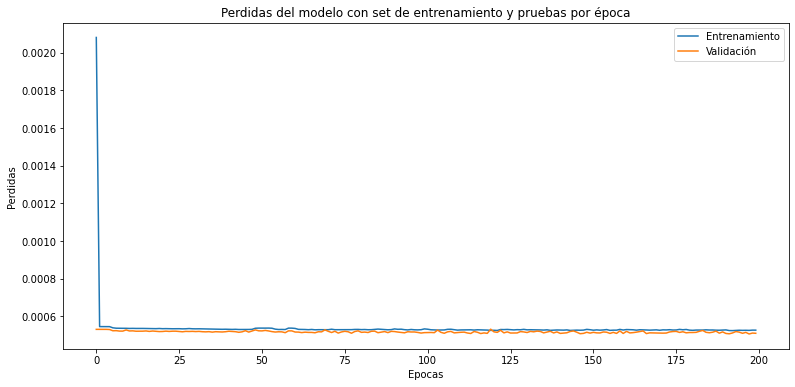

In [105]:
plt.figure(figsize = (13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del modelo con set de entrenamiento y pruebas por época')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

- Podemos observar como la función de perdida fue disminuyendo en cada epoca, tanto con los volores de entrenamiento como los de test. 
- Como el gap entre las dos líneas no es pronunciado, podemos inferir que nuestro modelo está funcionando de manera adecuada

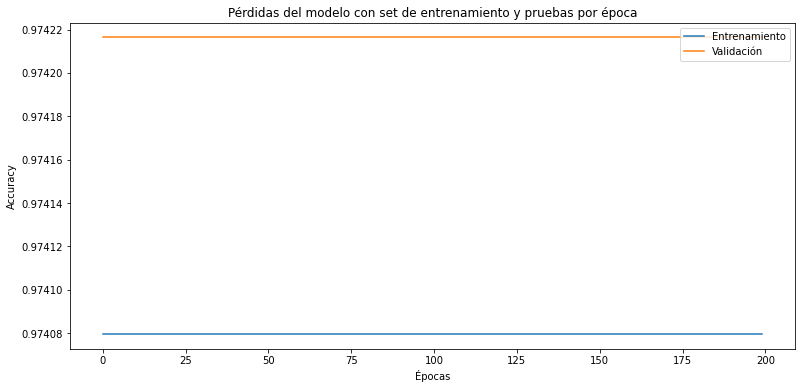

In [104]:
plt.figure(figsize=(13,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Pérdidas del modelo con set de entrenamiento y pruebas por época")
plt.ylabel('Accuracy')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

Nuevamente vemos comportamientos similares en los resultados obtenidos. 
Esta grafica muestra como el modelo ha mejorado su presición entre las diferentes epocas.  
El proximo paso sera probar este modelo con los datos provenientes de otras casas

## Ajuste de redes neuronales: overfitting y regularización

**Overfitting:** El sobre entrenamiento o sobre ajuste hace referencia a que la curva se ajusta de tal manera que cada punto del data set es cruzado por la función modelo
- Este fenomeno ocurre cuando entrenamos el modelo con información no apropiada o si exageramos la cantidad de epocas.  
- Esto ocasiona que el modelo memorice los datos, lo cual provoca que el modelo no sepa como interpretar datos que no ha visto en la etapa de aprendizaje.
- La grafica muestra la complejidad en el eje x y el error en el eje y. Se muestra como el error disminuye a medida que aumentamos la complejidad del entrenamiento. Pero llega un punto donde la prueba del modelo con los datos de test, deja de disminuir el error e inicia a aumentarlo. Este es un caso de sobre entrenamiento.
- Una opción para evitar este fallo es detener el proceso de entrenamiento cuando detectamos que el gap entre el set de entrenamiento y prueba son demasiado pronunciados o amplios. 
- Matematicamente cuando existe una alta varianza y un bajo baias es un indicador de overfitting.
- El estremo contrario es un indicador de sub entrenamiento. 

**Regularización:** La regularización es un método que nos ayuda a evitar el overfitting. Lo hace penalizando o minimizando la complejidad de la red neuronal. Esta penalización consiste en identificar la variables que no aportan o aportan poco a la identificación de la variable obetivo. Existen diferentes métodos de regularización:

- Regularización Lasso ó L1: Penaliza la suma de los valores absolutos de los pesos. Genera un modelo mas simple e interpretable. Es robusto a los outliers. 

- Regularización Ridge ó L2: Penaliza la suma de cuadrados de los valores de los pesos. El parametro lambda suele ser pequeño. Útil para aprender patrones complejos de los datos. No es robustoa outliers. Permite encontrar correlaciones entre datos de multiples variables. Por esto da valores altos a los pesos. 

- Regularización ElasticNet: Combina ambos beneficios de regularización Lx: L1: eliminar pesos no significativos L2: eliminar pesos correlacionados. Es muy util cuando tenemos multiples variables que se correlacionan entre si y otros que no son muy utiles entre sí. Requiere de dos parametros lambda correspondientes a las dos regularizaciones que lo conforman.

- Regulación dropout: Consiste en apagar de manera aleatoria un porcentaje de neuronas en cada capa. Esto ayuda a aumentar el tiempo de entrenamiento, al disminuir el número de neuronas en el modelo. Pero su aporte más importante, consiste en que las neuronas subsiguientes no dependeran absolutamente de los resultados de las neuronas que lo preceden. Disminuyendo el overfitting. En Keras se instancia despues de crear una capa indicando en sus parametros el % de neuronas a apagar. 

- BatchNorm: Este se considera una inovación clave en el deep learning moderno (2016). Similar a la normalización de los inputs, pero en capas intermedias. Consiste en tomar un batch de datos calcular su media y varianza, actualizar los datos restandolos por su media y dividiendo por su varianza a esto sumarle la constante epsilon, para luego aplicarle una transformación. Más información en este link:
https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

- Data Augmentation: Esta técnica es simple pero elgante y se aplica bastante en imagenes, consiste en rotar la imagen o hacerle un zoom e incluir esta matriz en el algoritmo, ya sea el de una red generativa o convolucional. Es la misma imagen pero su matriz de datos no es la misma.

In [107]:
'''
#Ejemplo de regularización usando Keras

from keras import regularizers, Sequential
model = Sequential()
#Usando una regularización L1
model.add(Dense(24, input_dim = Numero_Variables,
                kernel_regularizaers = regularizaers.l1(0.01) #El parametro es el valor de lambda 
))

#Usando una regularización L2
model.add(Dense(24, input_dim = Numero_Variables,
                kernel_regularizaers = regularizaers.l2(0.01) #El parametro es el valor de lambda 
))

#Usando una regularización elastic net lx
model.add(Dense(24, input_dim = Numero_Variables,
                kernel_regularizaers = regularizaers.l1_l2(l1=0.01, l2 = 0.01) #El parametro es el valor de lambda 
))

#Usando regularización dropout, requiere el porcentaje de neuronas a apagar
model.add(Dropout(0.2))
'''

'\n#Ejemplo de regularización usando Keras\n\nfrom keras import regularizers, Sequential\nmodel = Sequential()\n#Usando una regularización L1\nmodel.add(Dense(24, input_dim = Numero_Variables,\n                kernel_regularizaers = regularizaers.l1(0.01) #El parametro es el valor de lambda \n))\n\n#Usando una regularización L2\nmodel.add(Dense(24, input_dim = Numero_Variables,\n                kernel_regularizaers = regularizaers.l2(0.01) #El parametro es el valor de lambda \n))\n\n#Usando una regularización elastic net lx\nmodel.add(Dense(24, input_dim = Numero_Variables,\n                kernel_regularizaers = regularizaers.l1_l2(l1=0.01, l2 = 0.01) #El parametro es el valor de lambda \n))\n\n'

# Ajuste de redes neuronales: Hiper parámetros

Los parametros nos ayudan a ajustar los pesos sinapticos entre las neuronas. Es decir los pesos sinapticos que hacen la multiplicación entre las entradas y las funciones de activación para obtener la salida entre las capas.  
Adicionalmente existen los hiperparametros, que se refieren a las caracteristicas de configuración para ajustar el modelo de red neuronal, no existe un metodo que indique cuales son los valores adecuados para encontrar estos datos de ajuste. Sin embargo, si hay una serie de pasos logicos que ayudan a encontrar aproximaciones con buenos resultados. 

### Numero de capas y neuronas por capa:

**Numero de capas:** Al aumentar el numero de capas se aumenta el tiempo de entrenamiento y la complejidad del modelo. Pero a su vez, el modelo es capaz de aprender comportamientos muy complejos. La recomendación es iniciar con una pequeña arquitectura e ir aumentando poco a poco hasta encontrar una cantidad adecuada de capas. 

**Número de neuronas:** Este valor acompaña directamente el número de capas del modelo. Por convensión se inicia la primera capa como:  
Número de neuronas = Potencia de dos mas cercana a 2 * (número de neuronas).  

Por ejemplo: Variables = 30 entradas -> 30 * 2 = 60, la potencia mas cercana a 60 es 2^6 = 64  

Es aconsejable iniciar la primera capa con 64 neuronas. Las siguientes capas, generalmente tienen menos neuronas respecto a la primera, esta disminución debe hacerse tambien en potencias de dos. Por ejemplo 2^5 = 32 neuronas-

### Épocas e inicializadores 

**Epocas:** A medida que se va entrenando el modelo (mas epocas), la función de error va disminuyendo. Pero llega un punto donde la función de error para el set de entrenamiento sigue disminuyendo pero para el set de prueba aumenta. En este punto las dos graficas divergen y podemos usar este punto como metodo de regularización. A este punto se le denomina early termination y servira para ajustar este modelo hasta esta cantidad de epocas. 

**Inicializadores:** La inicialización glorot es ampliamente usada y generalmente acertada para inicializar los pesos de nuestra red neuronal. 

**Taza de aprendizaje o learning rate:** El optimizador de adam tiene un valor por defecto para inicializar

**Batch o lote de datos:** Sirve para entregar un lote de datos por partes, este tamaño se recomienda pasarlo en función de una potencia de dos. Si aumentamos el tamaño de batch el entrenamiento sera mas preciso pero más lento de entrenar. Si el batch es pequeño, el modelo entrenara mas rapido pero pierde presición.

## Funciones de activación y perdida:

Elegir una de ellas esta ligado a si tenemos una regresión o una clasificación. La siguiente tabla resume las recomendaciones para elegir la función de perdida y la función de activación de la ultima capa según el tipo de salida que tenemos como resultado de nuestro modelo. Para las capas ocultas es recomendable usar relu y comunmente MSE 

| Tipo de problema| Tipo de salida                         | Función de activación final | Función de perdidas    |
| :-------------: | :------------------------------------: | :-------------------------: | :--------------------: |
| Regresión       | Valor numerico                         | Linear                      | Mean Square Error      |
| Clasificación   | Salida Binaria                         | Sigmoid                     | Binary cross entropy   |
| Clasificación   | Unica etiqueta, multiples clases       | Softmax                     | Cross entropy          |
| Clasificación   | Multiples etiquetas, multiples clases  | Sigmoid                     | Binary cross entropy   |

## Librerias de ajuste y optimización de hiperparametros en Keras

- Hiperopt -> Libreria popular de Python enfocada en optimizar todo tipo de espacios de busqueda, incluyendo espacios reales como las tasa de aprendizaje, o valores discretos como el número de capas. 
- Hyperast, kopt o talos -> Librerias de optimización de modelos implementados en keras
- Scikit optimize (Skopt) -> Hace una busqueda de hiperparametros en modalidad de grilla. Evalundo diferentes combinacioenes hasta optener un punto optimo. 

En cuanto a keras existen algo conocido como callbacks que son procesos que se aplican dentro del entrenamiento y mejoran estos hiperparametros, en el orden del video que conozca existen:

**EarlyStopping**
Este detiene el entrenamiento al no ver mejora en una metrica como la perdidad, error, loss, val_loss, entre otras, cuenta con un parametro paciencia que permite ajustar a las epocas de no ver mejoria en el entrenamiento parara.

**ModelCheckpoint**
Este callback guarda los pesos y estructura del modelo entrenado por cada epoca, tambien se puede configurar para que guarde solo si el modelo ha mejorado en la epoca actual.

**ReduceLROnPlateau**
Tiene la funcion de monitorear una metrica de mejora configurada por el usuario y cuando no vea mejora reduce la taza de aprendizaje(Learning Rate) lo que le permite frenar el paso cada vez mas y encontrar el minimo local o global.

**Tensorboard**
Es un dashboard con toda la informacion y metricas pertinentes configurada en uno o varios modelos, es un tablero superdinamico que permite comparar modelos y configuraciones.

# La normalización ha fracasado investigar como se normaliza de manera correcta una señal

In [ ]:
from keras.models import Sequential from keras.layers import Dense, Activation model = Sequential() model.add(Dense(102, input_dim=102, kernel_initializer='normal',activation='relu')) model.add(Dense(30, kernel_initializer='normal',activation='relu')) model.add(Dense(10, kernel_initializer='normal',activation='relu')) model.add(Dense(3, kernel_initializer='normal')) model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])